# Supervised Learning
This notebook trains various supervised learning classification models including Logistic Regression, Decision Trees, Random Forest and SVM, to predict heart disease.

## 1. Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## 2. Loading the feature selected dataset

In [2]:
df = pd.read_csv("../data/selected_feature_heart_disease.csv")

X = df.drop("target", axis=1)
y = df["target"]

## 3. Splitting the data into training and testing

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

## 4. Training and Evaluating Models

### 4.1 Logistic Regression model

=== Logistic Regression Evaluation ===
Accuracy: 0.639344262295082
Precision: 0.5772148951614008
Recall: 0.639344262295082
F1 Score: 0.6027515802394584
AUC Score: 0.8276668822875719


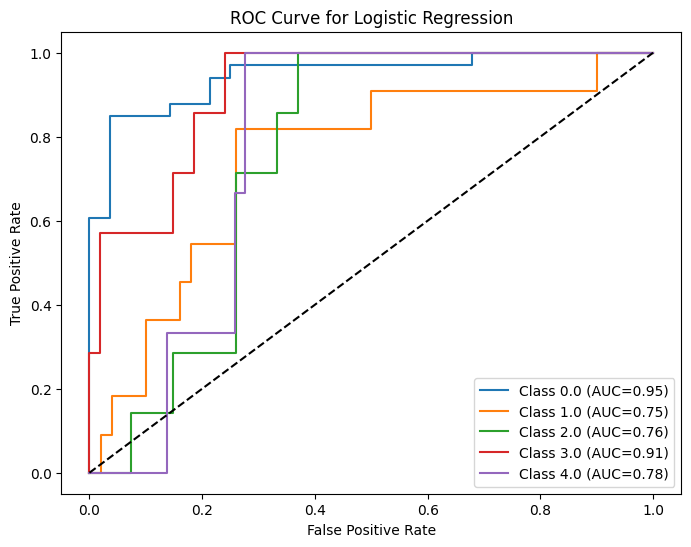

In [4]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("=== Logistic Regression Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="weighted"))
print("Recall:", recall_score(y_test, y_pred, average="weighted"))
print("F1 Score:", f1_score(y_test, y_pred, average="weighted"))
print("AUC Score:", roc_auc_score(y_test, lr.predict_proba(X_test), multi_class="ovr"))

plt.figure(figsize=(8,6))
for i, cols in enumerate(np.unique(y_test)):
    fpr, tpr, threshold = roc_curve(y_test_bin[:, i], lr.predict_proba(X_test)[:, i])
    plt.plot(fpr, tpr, label=f"Class {cols} (AUC={auc(fpr, tpr):.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.show()

### 4.2 Decision Tree model

=== Decision Tree Evaluation ===
Accuracy: 0.4918032786885246
Precision: 0.4585480093676816
Recall: 0.4918032786885246
F1 Score: 0.47436837029893925
AUC Score: 0.5319357947288982


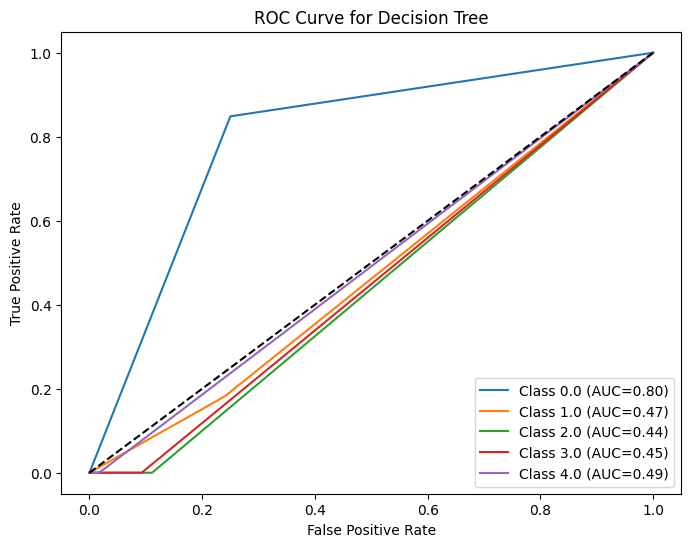

In [5]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("=== Decision Tree Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="weighted"))
print("Recall:", recall_score(y_test, y_pred, average="weighted"))
print("F1 Score:", f1_score(y_test, y_pred, average="weighted"))
print("AUC Score:", roc_auc_score(y_test, dt.predict_proba(X_test), multi_class="ovr"))

plt.figure(figsize=(8,6))
for i, cols in enumerate(np.unique(y_test)):
    fpr, tpr, threshold = roc_curve(y_test_bin[:, i], dt.predict_proba(X_test)[:, i])
    plt.plot(fpr, tpr, label=f"Class {cols} (AUC={auc(fpr, tpr):.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decision Tree")
plt.legend()
plt.show()

### 4.3 Random Forest model

=== Random Forest Evaluation ===
Accuracy: 0.5573770491803278
Precision: 0.4449648711943794
Recall: 0.5573770491803278
F1 Score: 0.4944262295081967
AUC Score: 0.7733462705876499


c:\1. F A M I L Y\George\GitHub\Heart-Disease-Predictor\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


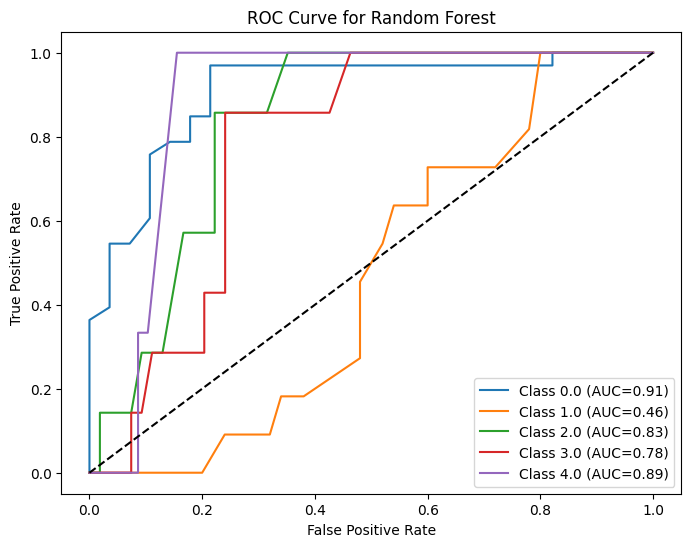

In [6]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("=== Random Forest Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="weighted"))
print("Recall:", recall_score(y_test, y_pred, average="weighted"))
print("F1 Score:", f1_score(y_test, y_pred, average="weighted"))
print("AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test), multi_class="ovr"))

plt.figure(figsize=(8,6))
for i, cols in enumerate(np.unique(y_test)):
    fpr, tpr, threshold = roc_curve(y_test_bin[:, i], rf.predict_proba(X_test)[:, i])
    plt.plot(fpr, tpr, label=f"Class {cols} (AUC={auc(fpr, tpr):.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.legend()
plt.show()

### 4.4 Support Vector Machine model

=== SVM Evaluation ===
Accuracy: 0.5409836065573771
Precision: 0.41898589401448727
Recall: 0.5409836065573771
F1 Score: 0.4719585849870578
AUC Score: 0.7905160305849961


c:\1. F A M I L Y\George\GitHub\Heart-Disease-Predictor\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


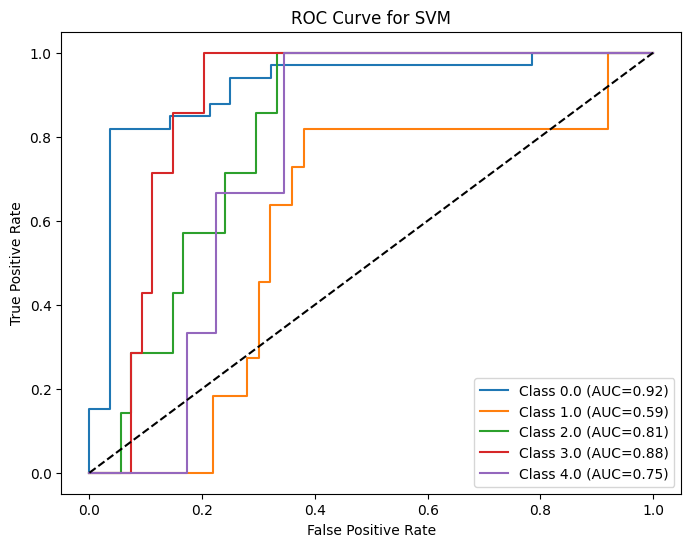

In [7]:
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print("=== SVM Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="weighted"))
print("Recall:", recall_score(y_test, y_pred, average="weighted"))
print("F1 Score:", f1_score(y_test, y_pred, average="weighted"))
print("AUC Score:", roc_auc_score(y_test, svm.predict_proba(X_test), multi_class="ovr"))

plt.figure(figsize=(8,6))
for i, cols in enumerate(np.unique(y_test)):
    fpr, tpr, threshold = roc_curve(y_test_bin[:, i], svm.predict_proba(X_test)[:, i])
    plt.plot(fpr, tpr, label=f"Class {cols} (AUC={auc(fpr, tpr):.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVM")
plt.legend()
plt.show()

## 5. Evaluation between models using ROC curve

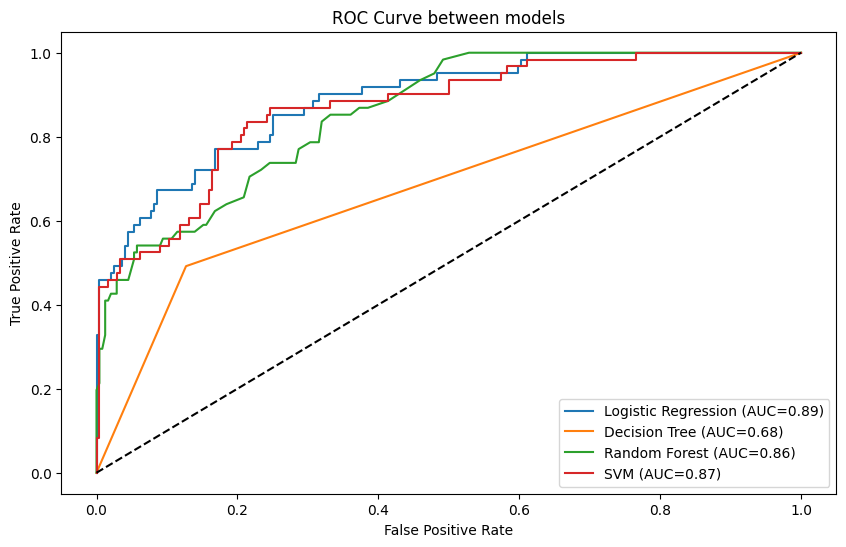

In [8]:
plt.figure(figsize=(10, 6))

# Logistic Regression
fpr, tpr, threshold = roc_curve(y_test_bin.ravel(), lr.predict_proba(X_test).ravel())
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC={auc(fpr, tpr):.2f})')

# Decision Tree
fpr, tpr, threshold = roc_curve(y_test_bin.ravel(), dt.predict_proba(X_test).ravel())
plt.plot(fpr, tpr, label=f'Decision Tree (AUC={auc(fpr, tpr):.2f})')

# Random Forest
fpr, tpr, threshold = roc_curve(y_test_bin.ravel(), rf.predict_proba(X_test).ravel())
plt.plot(fpr, tpr, label=f'Random Forest (AUC={auc(fpr, tpr):.2f})')

# SVM
fpr, tpr, threshold = roc_curve(y_test_bin.ravel(), svm.predict_proba(X_test).ravel())
plt.plot(fpr, tpr, label=f'SVM (AUC={auc(fpr, tpr):.2f})')

plt.plot([0,1], [0,1], "k--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve between models')
plt.legend()
plt.show()